In [17]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [15]:
conn = sqlite3.connect('../db.sqlite3')
query = '''
SELECT
    o.id AS order_id,
    o.datetime AS order_date,
    oi.id AS orderitem_id,
    oi.quantity,
    p.id AS product_id,
    p.name AS product_name,
    p.price AS product_price
FROM
    restaurant_order o
JOIN
    restaurant_orderitem oi ON o.id = oi.order_id
JOIN
    restaurant_product p ON oi.product_id = p.id
'''

df = pd.read_sql_query(query, conn)
print(f"Number of rows: {df.shape[0]}")

df.to_csv('../combined_data.csv', index=False)
df_combined = pd.read_csv('../combined_data.csv')
print(df_combined.head())

Number of rows: 74818
   order_id           order_date  orderitem_id  quantity  product_id  \
0         1  2019-08-03 20:25:00             1         2           6   
1         1  2019-08-03 20:25:00             2         1         240   
2         1  2019-08-03 20:25:00             3         1          19   
3         1  2019-08-03 20:25:00             4         1          36   
4         1  2019-08-03 20:25:00             5         1         111   

          product_name  product_price  
0        Plain Papadum           0.80  
1     King Prawn Balti          12.95  
2          Garlic Naan           2.95  
3        Mushroom Rice           3.95  
4  Paneer Tikka Masala           8.95  


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

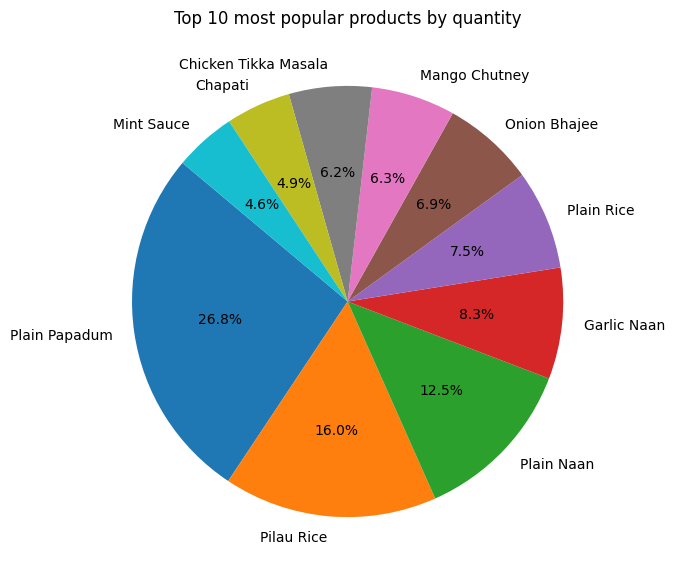

In [19]:
top_10_products = df_combined.groupby('product_name')['quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 7))
top_10_products.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 most popular products by quantity')
plt.ylabel('')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

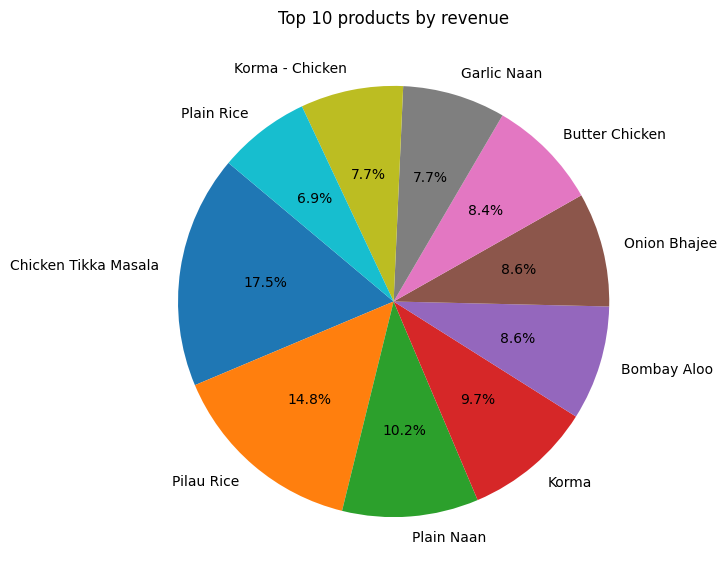

In [21]:
df_combined['item_price'] = df_combined['product_price'] * df_combined['quantity']
top_10_products_by_revenue = df_combined.groupby('product_name')['item_price'].sum().nlargest(10)

plt.figure(figsize=(10, 7))
top_10_products_by_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 products by revenue')
plt.ylabel('')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

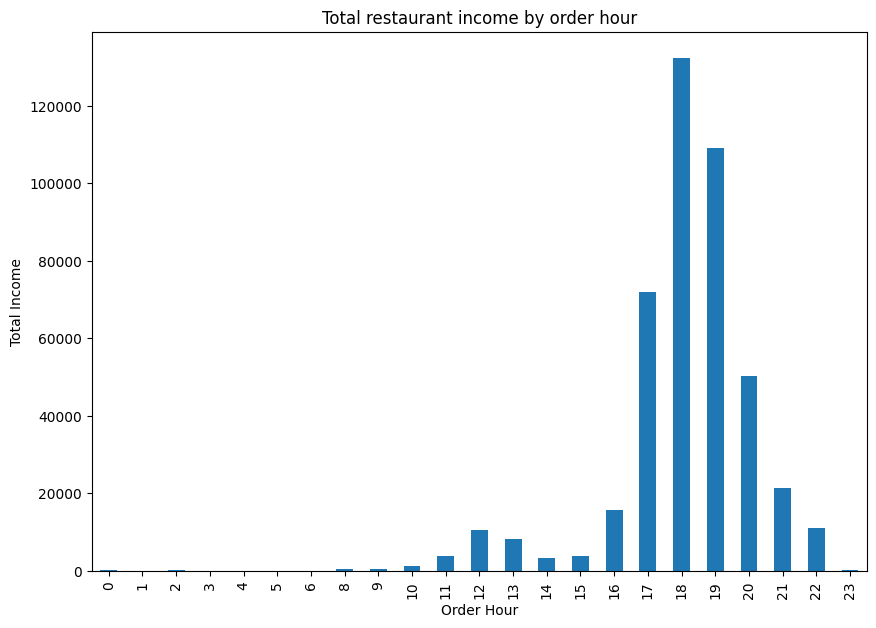

In [22]:
df_combined['order_date'] = pd.to_datetime(df_combined['order_date'])
df_combined['order_hour'] = df_combined['order_date'].dt.hour
income_by_hour = df_combined.groupby('order_hour')['item_price'].sum()

plt.figure(figsize=(10, 7))
income_by_hour.plot(kind='bar')
plt.title('Total restaurant income by order hour')
plt.xlabel('Order Hour')
plt.ylabel('Total Income')
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

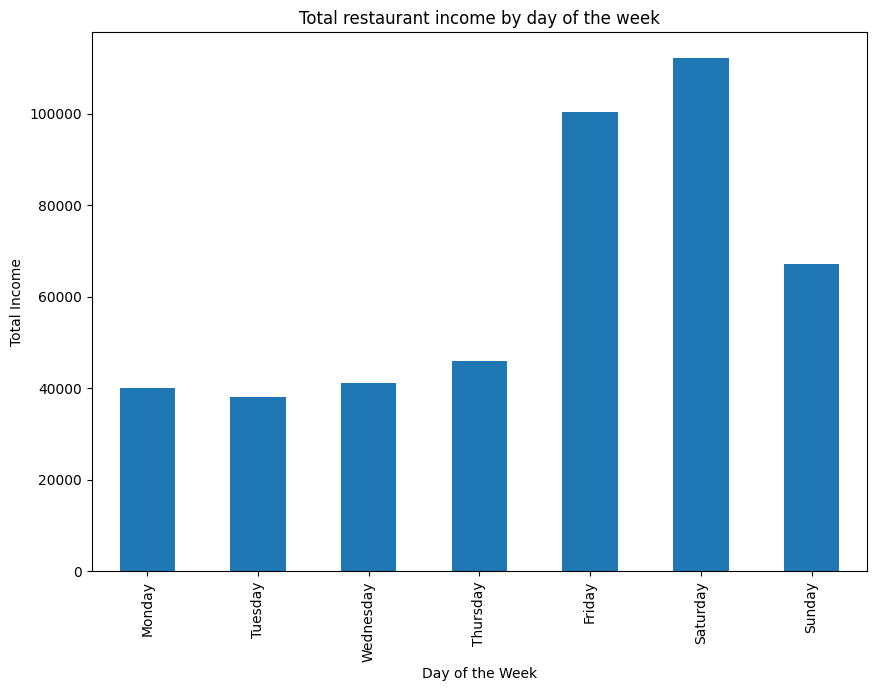

In [23]:
df_combined['order_day_of_week'] = df_combined['order_date'].dt.day_name()
income_by_day_of_week = df_combined.groupby('order_day_of_week')['item_price'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 7))
income_by_day_of_week.plot(kind='bar')
plt.title('Total restaurant income by day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Income')
plt.show()